<a href="https://colab.research.google.com/github/jyLynn/LLM/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --quiet --upgrade langchain langchain-community langchain-chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.4/20.4 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.2/467.2 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 76.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 1.9 MB/s eta 0:00:

In [2]:
!pip install -qU langchain-cohere

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.0/303.0 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 449.8/449.8 kB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 125.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 70.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-classic 1.0.0 requires langchain-core<2.0.0,>=1.0.0, but you have langchain-core 0.3.79 which is incompatible.
langchain-classic 1.0.0 requires langchain-text-splitters<2.0.0,>=1.0.0, but you have langchain-text-splitters 0.3.11 which is incompatible.
langchain-chroma 1.0.0 requires langchain-core<2.0.0,>=1.0.0, but you have langchain-core 0

In [3]:
!pip install pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 10.4 MB/s eta 0:00:00


In [5]:
# !pip install langchain-huggingface
# pip install -U langchain-huggingface

  Using cached langchain_core-1.0.0-py3-none-any.whl.metadata (3.4 kB)
Using cached langchain_core-1.0.0-py3-none-any.whl (467 kB)
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.79
    Uninstalling langchain-core-0.3.79:
      Successfully uninstalled langchain-core-0.3.79
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-classic 1.0.0 requires langchain-text-splitters<2.0.0,>=1.0.0, but you have langchain-text-splitters 0.3.11 which is incompatible.
langchain 0.3.27 requires langchain-core<1.0.0,>=0.3.72, but you have langchain-core 1.0.0 which is incompatible.
langchain-cohere 0.4.6 requires langchain-core<0.4.0,>=0.3.76, but you have langchain-core 1.0.0 which is incompatible.


In [7]:
import getpass
import os

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_API_KEY"] = getpass.getpass()

··········


In [4]:
import bs4
from langchain import hub
from langchain_chroma import Chroma
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.chains import RetrievalQA
from langchain.prompts import PromptTemplate

In [5]:
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline


In [6]:
from langchain_community.llms import HuggingFacePipeline

In [ ]:
# from langchain_huggingface import HuggingFacePipeline

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# title Load
def load_pdf_with_meta(path):
    loader = PyPDFLoader(path)
    docs = loader.load()  # each page as a Document with metadata['page']
    return docs

raw_docs = []
pdfs = ['Article1.pdf','Article2.pdf']
for name in pdfs:
    raw_docs += load_pdf_with_meta(f"/content/drive/MyDrive/Applied GenAI/HW2/{name}")


In [10]:
# chunking
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=320,
    chunk_overlap=60,  # avoid semantic discontinuity
    length_function=len,
    add_start_index=True
)
docs = text_splitter.split_documents(raw_docs)

In [11]:
import pathlib
# record the file name and page number for tracking.
for d in docs:
    d.metadata["source_file"] = pathlib.Path(d.metadata.get("source", "Unknown")).name
    d.metadata["page_no"] = d.metadata.get("page", None)

len(docs), docs[0].metadata

(353,
 {'producer': 'pdfTeX-1.40.25',
  'creator': 'LaTeX with hyperref',
  'creationdate': '2025-01-03T01:59:13+00:00',
  'author': '',
  'keywords': '',
  'moddate': '2025-01-03T01:59:13+00:00',
  'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5',
  'subject': '',
  'title': '',
  'trapped': '/False',
  'source': '/content/drive/MyDrive/Applied GenAI/HW2/Article1.pdf',
  'total_pages': 31,
  'page': 0,
  'page_label': '1',
  'start_index': 0,
  'source_file': 'Article1.pdf',
  'page_no': 0})

### Test retrieval quality using 100% data samples

In [12]:
#build Chroma vector index

from langchain_community.vectorstores import Chroma

embedding = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

PERSIST_DIR = "/content/drive/MyDrive/Applied GenAI/HW2/chroma_db"
COLLECTION = "retrieve_papers"

vectorstore = Chroma.from_documents(
    documents=docs,
    embedding=embedding,
    collection_name=COLLECTION,
    persist_directory=PERSIST_DIR,
)

vectorstore.persist()

retriever = vectorstore.as_retriever(search_kwargs={"k": 8})
print("Chroma index built with", len(docs), "chunks at", PERSIST_DIR)

/tmp/ipython-input-3417581243.py:5: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or d

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Chroma index built with 353 chunks at /content/drive/MyDrive/Applied GenAI/HW2/chroma_db


/tmp/ipython-input-3417581243.py:17: LangChainDeprecationWarning: Since Chroma 0.4.x the manual persistence method is no longer supported as docs are automatically persisted.
  vectorstore.persist()


In [31]:
import torch
# from transformers import AutoModelForSeq2SeqLM

In [28]:
model_name = "microsoft/Phi-3.5-mini-instruct" # mistralai/Mistral-7B-Instruct-v0.3，microsoft/Phi-3.5-mini-instruct，google/flan-t5-base

In [32]:
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",
    torch_dtype=torch.float16,
)

`torch_dtype` is deprecated! Use `dtype` instead!


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/195 [00:00<?, ?B/s]

'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: e95541d2-5ad0-4354-abc9-fe82ca3b689e)')' thrown while requesting HEAD https://huggingface.co/microsoft/Phi-3.5-mini-instruct/resolve/main/custom_generate/generate.py
Retrying in 1s [Retry 1/5].


In [33]:
gen_pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=512,
    temperature=0.2,
    do_sample=False
)

Device set to use cuda:0


In [ ]:
# import langchain as _lc

# if not hasattr(_lc, "verbose"):
#     _lc.verbose = False

In [34]:
llm = HuggingFacePipeline(pipeline=gen_pipe)

In [25]:
# !pip install -upgrade langchain

In [35]:
from langchain.chains import RetrievalQA
from langchain.prompts import PromptTemplate

template = """Use the following context to answer the question.
Cite the source file and page at the end.

Context:
{context}

Question:
{question}

Answer:"""

prompt = PromptTemplate(template=template, input_variables=["context", "question"])
qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    retriever=retriever,
    chain_type="stuff",
    chain_type_kwargs={"prompt": prompt}
)

In [ ]:
result = qa_chain.invoke("What are the core architectural layers of a vertical AI agent system as described by Dr. Bousetouane?")
print(result)

In [36]:
import pandas as pd
from IPython.display import display, Markdown

test_queries = [
    "What are the core architectural layers of a vertical AI agent system as described by Dr. Bousetouane?",
    "Explain how agentic systems are designed to improve decision-making in enterprise workflows.",
    "What are the main cognitive components of a physical AI agent?",
    "How do physical agents integrate perception, reasoning, and action in real-world environments?",
    "How can vision-based generative models be combined with agentic systems for autonomous task execution?",
]

rows = []
for q in test_queries:
    ans = qa_chain.run(q)
    rows.append({"Question": q, "Answer": ans})

df = pd.DataFrame(rows)

display(df)

,Question,Answer
0,What are the core architectural layers of a ve...,Use the following context to answer the questi...
1,Explain how agentic systems are designed to im...,Use the following context to answer the questi...
2,What are the main cognitive components of a ph...,Use the following context to answer the questi...
3,"How do physical agents integrate perception, r...",Use the following context to answer the questi...
4,How can vision-based generative models be comb...,Use the following context to answer the questi...


### Test retrieval quality using 50% data samples

In [59]:
import random
from collections import defaultdict

random.seed(42)

by_src = defaultdict(list)
for d in docs:
    by_src[d.metadata.get("source_file","Unknown")].append(d)

hf_docs = []
for src, items in by_src.items():
    n = int(len(items) * 0.5)
    idxs = random.sample(range(len(items)), n)
    hf_docs.extend([items[i] for i in idxs])

print(f"Stratified 50% chunks: {len(hf_docs)} / {len(docs)}")

hf_vectorstore = Chroma.from_documents(
    documents=hf_docs,
    embedding=embedding,
    collection_name=f"{COLLECTION}_half",
    persist_directory=PERSIST_DIR,
)
hf_vectorstore.persist()
hf_retriever = hf_vectorstore.as_retriever(search_kwargs={"k": 8})


Stratified 50% chunks: 176 / 353


In [60]:
from langchain.chains import RetrievalQA
from langchain.prompts import PromptTemplate

template = """Use the following context to answer the question.
Cite the source file and page at the end.

Context:
{context}

Question:
{question}

Answer:"""

prompt = PromptTemplate(template=template, input_variables=["context", "question"])
hf_qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    retriever=hf_retriever,
    chain_type="stuff",
    chain_type_kwargs={"prompt": prompt}
)

In [61]:
import pandas as pd
from IPython.display import display, Markdown

test_queries = [
    "What are the core architectural layers of a vertical AI agent system as described by Dr. Bousetouane?",
    "Explain how agentic systems are designed to improve decision-making in enterprise workflows.",
    "What are the main cognitive components of a physical AI agent?",
    "How do physical agents integrate perception, reasoning, and action in real-world environments?",
    "How can vision-based generative models be combined with agentic systems for autonomous task execution?",
]

rows = []
for q in test_queries:
    ans = hf_qa_chain.run(q)
    rows.append({"Question": q, "Answer": ans})

hf_df = pd.DataFrame(rows)

display(hf_df)

,Question,Answer
0,What are the core architectural layers of a ve...,Use the following context to answer the questi...
1,Explain how agentic systems are designed to im...,Use the following context to answer the questi...
2,What are the main cognitive components of a ph...,Use the following context to answer the questi...
3,"How do physical agents integrate perception, r...",Use the following context to answer the questi...
4,How can vision-based generative models be comb...,Use the following context to answer the questi...


### Visualize Embeddings with UMAP

In [45]:
import matplotlib.pyplot as plt
import umap
from sklearn.metrics.pairwise import cosine_similarity

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


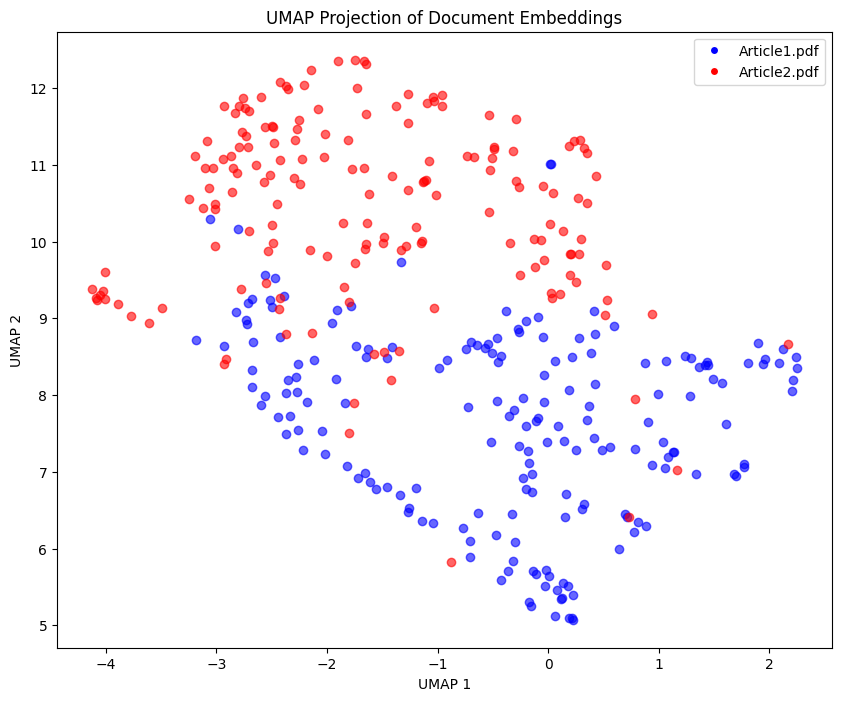

In [43]:
embeddings = embedding.embed_documents([doc.page_content for doc in docs])
reducer = umap.UMAP(n_components=2, random_state=42)
umap_embeddings = reducer.fit_transform(embeddings)

plt.figure(figsize=(10, 8))
for i, doc in enumerate(docs):
    color = 'blue' if doc.metadata['source_file'] == 'Article1.pdf' else 'red'
    plt.scatter(umap_embeddings[i, 0], umap_embeddings[i, 1], c=color, alpha=0.6)
plt.title("UMAP Projection of Document Embeddings")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', label='Article1.pdf'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', label='Article2.pdf')
])
plt.show()

In [46]:
similarity_matrix = cosine_similarity(embeddings)
threshold = 0.8
clusters = []
visited = [False] * len(docs)

for i in range(len(docs)):
    if not visited[i]:
        cluster = [i]
        for j in range(i + 1, len(docs)):
            if similarity_matrix[i][j] > threshold and not visited[j]:
                cluster.append(j)
                visited[j] = True
        clusters.append(cluster)
        visited[i] = True

print("\nCluster Analysis:")
for idx, cluster in enumerate(clusters):
    print(f"\nCluster {idx + 1} ({len(cluster)} chunks):")
    for doc_idx in cluster[:3]:  # Show top 3 chunks
        doc = docs[doc_idx]
        print(f"Source: {doc.metadata['source_file']}, Page: {doc.metadata['page_no']}, Content: {doc.page_content[:100]}...")


Cluster Analysis:

Cluster 1 (2 chunks):
Source: Article1.pdf, Page: 0, Content: Agentic Systems: A Guide to Transforming
Industries with Vertical AI Agents
Fouad Bousetouane1,2
1Th...
Source: Article1.pdf, Page: 14, Content: vices [12].
Together, these industry innovations and academic advancements are driving
the rapid evo...

Cluster 2 (2 chunks):
Source: Article1.pdf, Page: 0, Content: demand for vertical intelligence tailored to diverse industries. These
systems enhance business outc...
Source: Article1.pdf, Page: 6, Content: we explore LLM agents, the bedrock of vertical AI agents, leveraging large
language models for domai...

Cluster 3 (1 chunks):
Source: Article1.pdf, Page: 0, Content: the cognitive backbone of these intelligent systems.
In response to the need for consistency and sca...

Cluster 4 (1 chunks):
Source: Article1.pdf, Page: 0, Content: tive Skills Module, which incorporates domain-specific, purpose-
built inference capabilities. Build...

Cluster 5 (1 chunks):
S